# Nashville Airbnb Rentals

In [2]:
import pandas as pd
import seaborn as sns
d = pd.read_csv("listings.csv")   #This data can be found through the link in readme

### The mean rental price for private rooms and  the mean rental price for entire home/apts

In [57]:
import numpy as np

In total: 35 districts

In [48]:
groupby_room_type = d['price'].groupby(d['room_type'])   #group by price over the types of rooms
groupby_room_type.mean()     #print out the mean prices of the types of rooms 

room_type
Entire home/apt    237.697834
Private room        93.368018
Shared room         67.923077
Name: price, dtype: float64

The mean rental price for private rooms 93.368 and the mean rental price for entire home/apts is 237.698. 

### Number of reviews vs. price 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0,0.5,'Price')

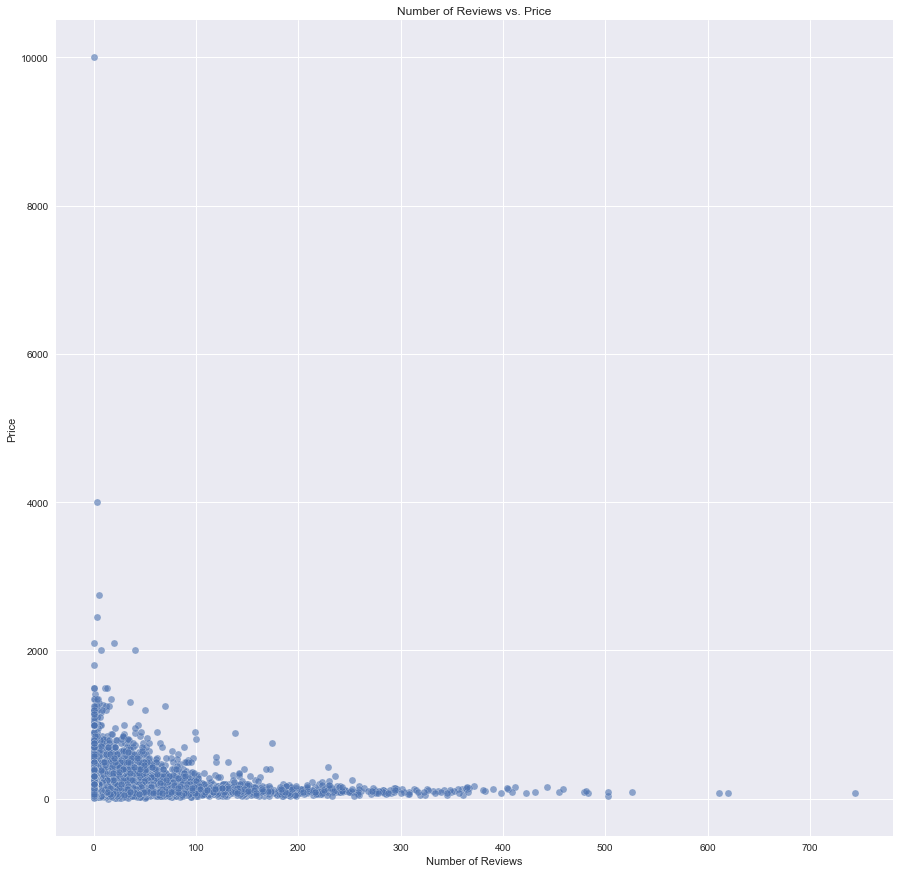

In [5]:
d.plot.scatter(x='number_of_reviews',y='price',figsize=(15,15), s=50, alpha=0.6, edgecolors='w')  #scatter plot of 
plt.style.use('seaborn')                                                #number 0f reviews vs. price
plt.title("Number of Reviews vs. Price")
plt.xlabel('Number of Reviews')
plt.ylabel('Price')

### the number of rental units (both private rooms and entire home/apts) by district (“neighbourhood”)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


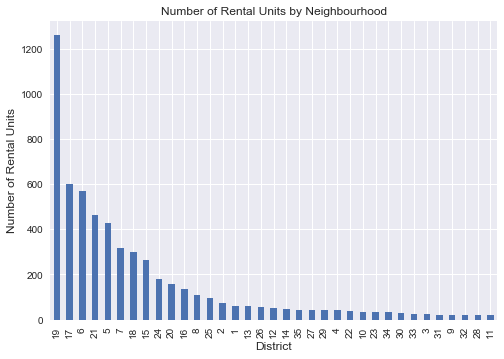

In [49]:
# d['neighbourhood'].value_counts().plot(kind='bar')
df = d[d.room_type != 'Shared room']
def process_number(x):      #function that seperates districts into numbers                   
    if " " in x:         
        number = x.split(" ")
        return int(number[1]) 
df['neighbourhood']=df['neighbourhood'].apply(process_number)    #change "neighbourhood" to integers 
d_sort = df.sort_values(by=['neighbourhood'])
d_sort['neighbourhood'].value_counts().plot(kind='bar')
plt.title('Number of Rental Units by Neighbourhood')
plt.ylabel('Number of Rental Units', fontsize=12)
plt.xlabel('District', fontsize=12)
plt.show()


###  airbnb rentals in the Nashville area

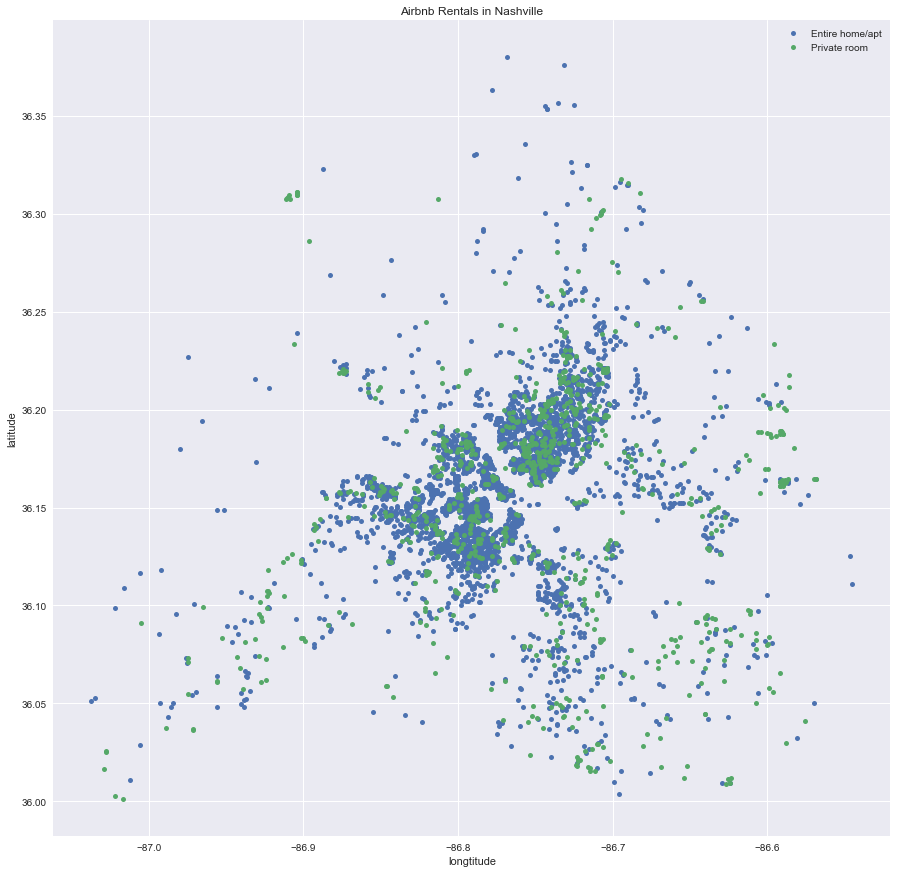

In [56]:
fig, ax = plt.subplots(figsize=(15,15))
groups = df.groupby('room_type')    #Groupby room_types: private room and entire apartment  
for name, room_type in groups:          
    ax.plot(room_type.longitude, room_type.latitude, marker='o', linestyle='',ms=5,label=name)   
ax.legend(numpoints=1)
plt.title('Airbnb Rentals in Nashville')   #Plotting the scatter plot 
plt.xlabel('longtitude')
plt.ylabel('latitude')
plt.show()
